In [1]:
!pip install transformers

     |████████████████████████████████| 1.3MB 9.1MB/s 
     |████████████████████████████████| 890kB 22.9MB/s 
     |████████████████████████████████| 2.9MB 46.8MB/s 
     |████████████████████████████████| 1.1MB 43.0MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=b39ec40aa3913783e8f9f1723d12923646cde97ae53da1d802c5ecd2b41eb954
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [9]:
!pip search transformers

ckip-transformers (0.1.0)                                 - CKIP Transformers
kogpt2-transformers (0.3.1)                               - Transformers library for KoGPT2
x-transformers (0.2.2)                                    - X-Transformers - Pytorch
invana-transformers (0.0.0b0)                             - A library to transforming JSON with parsers.
torch-transformers (1.0.4)                                - An implementation of Transformers using PyTorch
community-transformers (0.0.6)                            - A package of custom pyspark.ml transformers
kobert-transformers (0.4.1)                               - Transformers library for KoBERT, DistilKoBERT
more-transformers (0.0.11)                                - More transformers for scikit-learn pipelines
transformers-finetuning (0.3.7)                           - A Package for fine tuning based on transformers
deploy-transformers (0.1)                                 - Easily deploy HuggingFace Transformers on a websi

In [2]:
!git clone https://github.com/huggingface/transformers
%cd transformers/examples/lxmert

Cloning into 'transformers'...
remote: Enumerating objects: 56, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 53812 (delta 28), reused 48 (delta 21), pack-reused 53756
Receiving objects: 100% (53812/53812), 40.26 MiB | 28.36 MiB/s, done.
Resolving deltas: 100% (37544/37544), done.
/content/transformers/examples/lxmert


In [3]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=84c9c4445470e881a66b4977ed274bf5597da523f99837ec0153bdf3f04dad11
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [15]:
from IPython.display import clear_output, Image, display
import PIL.Image
import io
import json
import torch
import numpy as np
from processing_image import Preprocess
from visualizing_image import SingleImageViz
from modeling_frcnn import GeneralizedRCNN
from utils import Config
import utils
from transformers import LxmertForQuestionAnswering, LxmertTokenizer
import wget
import pickle
import os


#URL = "https://raw.githubusercontent.com/airsplay/py-bottom-up-attention/master/demo/data/images/input.jpg",
#URL = "https://vqa.cloudcv.org/media/test2014/COCO_test2014_000000262567.jpg"

URL = "https://wsd.casio.com/assets_v3/img/app/featured/horsebackriding/sns.png"
#URL = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRqoKXFt6ekikNMosXilvkAq9NOsHi4A80LaQ&usqp=CAU.jpg"
#img = image.open("image.jpg")
OBJ_URL = "https://raw.githubusercontent.com/airsplay/py-bottom-up-attention/master/demo/data/genome/1600-400-20/objects_vocab.txt"
ATTR_URL = "https://raw.githubusercontent.com/airsplay/py-bottom-up-attention/master/demo/data/genome/1600-400-20/attributes_vocab.txt"
GQA_URL = "https://raw.githubusercontent.com/airsplay/lxmert/master/data/gqa/trainval_label2ans.json"
VQA_URL = "https://raw.githubusercontent.com/airsplay/lxmert/master/data/vqa/trainval_label2ans.json"
    

# for visualizing output
def showarray(a, fmt='jpeg'):
    a = np.uint8(np.clip(a, 0, 255))
    f = io.BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))

In [16]:
# load object, attribute, and answer labels

objids = utils.get_data(OBJ_URL)
attrids = utils.get_data(ATTR_URL)
gqa_answers = utils.get_data(GQA_URL)
vqa_answers = utils.get_data(VQA_URL)

In [17]:
# load models and model components
frcnn_cfg = Config.from_pretrained("unc-nlp/frcnn-vg-finetuned")

frcnn = GeneralizedRCNN.from_pretrained("unc-nlp/frcnn-vg-finetuned", config=frcnn_cfg)

image_preprocess = Preprocess(frcnn_cfg)

lxmert_tokenizer = LxmertTokenizer.from_pretrained("unc-nlp/lxmert-base-uncased")
lxmert_gqa = LxmertForQuestionAnswering.from_pretrained("unc-nlp/lxmert-gqa-uncased")
lxmert_vqa = LxmertForQuestionAnswering.from_pretrained("unc-nlp/lxmert-vqa-uncased")

loading configuration file cache
loading weights file https://cdn.huggingface.co/unc-nlp/frcnn-vg-finetuned/pytorch_model.bin from cache at /root/.cache/torch/transformers/57f6df6abe353be2773f2700159c65615babf39ab5b48114d2b49267672ae10f.77b59256a4cf8343ae0f923246a81489fc8d82f98d082edc2d2037c977c0d9d0


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:434: UserWarning: Setting attributes on ParameterList is not supported.
  warnings.warn("Setting attributes on ParameterList is not supported.")


All model checkpoint weights were used when initializing GeneralizedRCNN.

All the weights of GeneralizedRCNN were initialized from the model checkpoint at unc-nlp/frcnn-vg-finetuned.
If your task is similar to the task the model of the checkpoint was trained on, you can already use GeneralizedRCNN for predictions without further training.


In [ ]:
#url is working
# trying with local upload
img= PIL.Image.open("image.jpg")


In [ ]:
img = np.asarray(img, dtype=np.uint8)

In [ ]:
frcnn_visualizer = SingleImageViz(img, id2obj=objids, id2attr=attrids)

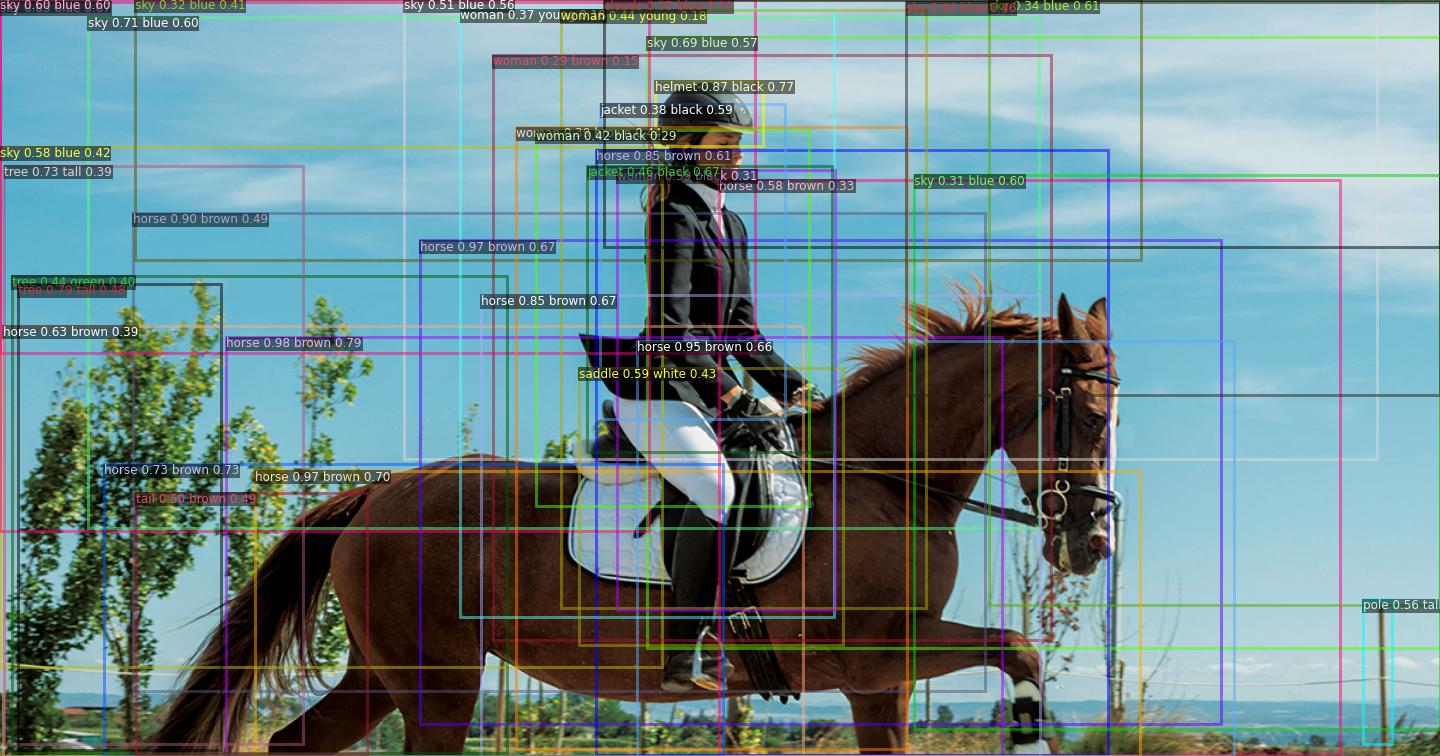

In [18]:
#image viz
frcnn_visualizer = SingleImageViz(URL, id2obj=objids, id2attr=attrids)
# run frcnn
images, sizes, scales_yx = image_preprocess(URL)# replace img with url to test with url images.
output_dict = frcnn(
    images, 
    sizes, 
    scales_yx=scales_yx, 
    padding="max_detections",
    max_detections=frcnn_cfg.max_detections,
    return_tensors="pt"
)
# add boxes and labels to the image

frcnn_visualizer.draw_boxes(
    output_dict.get("boxes"),
    output_dict.pop("obj_ids"),
    output_dict.pop("obj_probs"),
    output_dict.pop("attr_ids"),
    output_dict.pop("attr_probs"),
)
showarray(frcnn_visualizer._get_buffer())

In [ ]:
test_questions_for_url1 = [
    "Where is this scene?",
    "what is the woman riding?",
    "What is the woman wearing?",
    "What is the color of the horse?"
]
test_questions_for_url2 = [
    "Where is the cat?",
    "What is near the disk?",
    "What is the color of the table?",
    "What is the color of the cat?",
    "What is the shape of the monitor?",
]

#Very important that the boxes are normalized
normalized_boxes = output_dict.get("normalized_boxes")
features = output_dict.get("roi_features")

for test_question in test_questions_for_url1:
    # run lxmert
    test_question = [test_question]

    inputs = lxmert_tokenizer(
        test_question,
        padding="max_length",
        max_length=20,
        truncation=True,
        return_token_type_ids=True,
        return_attention_mask=True,
        add_special_tokens=True,
        return_tensors="pt"
    )

    # run lxmert(s)
    output_gqa = lxmert_gqa(
        input_ids=inputs.input_ids,
        attention_mask=inputs.attention_mask,
        visual_feats=features,
        visual_pos=normalized_boxes,
        token_type_ids=inputs.token_type_ids,
        return_dict=True,
        output_attentions=False,
    )
    output_vqa = lxmert_vqa(
        input_ids=inputs.input_ids,
        attention_mask=inputs.attention_mask,
        visual_feats=features,
        visual_pos=normalized_boxes,
        token_type_ids=inputs.token_type_ids,
        return_dict=True,
        output_attentions=False,
    )
    # get prediction
    pred_vqa = output_vqa["question_answering_score"].argmax(-1)
    pred_gqa = output_gqa["question_answering_score"].argmax(-1)
    print("Question:", test_question)
    print("prediction from LXMERT GQA:", gqa_answers[pred_gqa])
    print("prediction from LXMERT VQA:", vqa_answers[pred_vqa])

Question: ['Where is this scene?']
prediction from LXMERT GQA: pen
prediction from LXMERT VQA: outdoors
Question: ['what is the woman riding?']
prediction from LXMERT GQA: horse
prediction from LXMERT VQA: horse
Question: ['What is the woman wearing?']
prediction from LXMERT GQA: hat
prediction from LXMERT VQA: hat
Question: ['What is the color of the horse?']
prediction from LXMERT GQA: black
prediction from LXMERT VQA: black
